# Análisis de niveles de expresión de proteínas en la corteza cerebral de ratones con síndrome de Down

Antonio Elias Sánchez Soto

BDFC 301

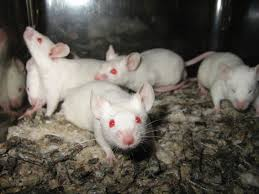

https://www.kaggle.com/datasets/ruslankl/mice-protein-expression?select=Data_Cortex_Nuclear.csv


**Acerca del Conjunto de Datos**

**Contexto**

Niveles de expresión de 77 proteínas medidas en la corteza cerebral de 8 clases de ratones de control y con síndrome de Down expuestos a un condicionamiento de miedo contextual, una tarea utilizada para evaluar el aprendizaje asociativo.

**Contenido**

El conjunto de datos consiste en los niveles de expresión de 77 proteínas/modificaciones proteicas que produjeron señales detectables en la fracción nuclear de la corteza. Hay 38 ratones de control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos, se registraron 15 mediciones de cada proteína por muestra/ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 mediciones, y para los ratones trisómicos, hay 34x15, o 510 mediciones. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medición puede considerarse como una muestra/ratón independiente.

Las ocho clases de ratones se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser de control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (contexto-choque) y otros no (choque-contexto). Para evaluar el efecto del fármaco memantina en la recuperación de la capacidad de aprendizaje en ratones trisómicos, algunos ratones han sido inyectados con el fármaco y otros no.

Clases:

- c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones)
- c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones)
- c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones)
- c-SC-m: ratones de control, no estimulados para aprender, inyectados con memantina (10 ratones)
- t-CS-s: ratones trisómicos, estimulados para aprender, inyectados con solución salina (7 ratones)
- t-CS-m: ratones trisómicos, estimulados para aprender, inyectados con memantina (9 ratones)
- t-SC-s: ratones trisómicos, no estimulados para aprender, inyectados con solución salina (9 ratones)
- t-SC-m: ratones trisómicos, no estimulados para aprender, inyectados con memantina (9 ratones)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Carga y exploración de Data Set

In [1]:
dataset=pd.read_csv("Data_Cortex_Nuclear.csv")
df=dataset.copy() #uso del copy para no aplicar los cambios directamente al data set
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [ ]:
# Obtener las columnas que son de tipo objeto
variablesObjeto = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar el resultado
print("Variables de tipo objeto:", variablesObjeto)

Variables de tipo objeto: ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']


In [ ]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


### Tratamientos de One-Hot y Label Encoding
Estos tratamientos deben realizarse con situaciones específicas. Debemos saber los valores que tienen cada columna donde se realice una clasificación. El objetivo de este proceso es preparar el data frame para mayor optimización del trabajo que realiza el modelo de apredizaje desarrollado

In [ ]:
df["Genotype"].value_counts()

Genotype
Control    570
Ts65Dn     510
Name: count, dtype: int64

In [ ]:
df["class"].value_counts()

class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: count, dtype: int64

In [ ]:
df["Treatment"].value_counts()

Treatment
Memantine    570
Saline       510
Name: count, dtype: int64

In [ ]:
df["Behavior"].value_counts()

Behavior
S/C    555
C/S    525
Name: count, dtype: int64

Por las características de las columnas se decide:
- Aplicar Label Encoding, donde se asigna un valor numérico a cada clasificación, con los atributos Genotype, Treatment y Behavior que cada uno posee dos tipos posibles.
- Aplicar One-Hot Encoding a la columna class debido a la gran cantidad de clases distintas, por lo que se generan columnas con valores booleanos paracada entidad, debe pertenecer a una clase u otra.

In [ ]:
# Label Encoding)
df["Genotype"] = df["Genotype"].map({'Control': 0, 'Ts65Dn': 1})
df["Treatment"] = df["Treatment"].map({'Memantine': 0, 'Saline': 1})
df["Behavior"] = df["Behavior"].map({'S/C': 0, 'C/S': 1})

# One-Hot Encoding
df = pd.get_dummies(df, columns=['class'])

df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Treatment,Behavior,class_c-CS-m,class_c-CS-s,class_c-SC-m,class_c-SC-s,class_t-CS-m,class_t-CS-s,class_t-SC-m,class_t-SC-s
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0,1,True,False,False,False,False,False,False,False
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0,1,True,False,False,False,False,False,False,False
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0,1,True,False,False,False,False,False,False,False
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0,1,True,False,False,False,False,False,False,False
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0,1,True,False,False,False,False,False,False,False


## Valores faltantes y duplicados

MouseID         0
DYRK1A_N        3
ITSN1_N         3
BDNF_N          3
NR1_N           3
               ..
class_c-SC-s    0
class_t-CS-m    0
class_t-CS-s    0
class_t-SC-m    0
class_t-SC-s    0
Length: 89, dtype: int64


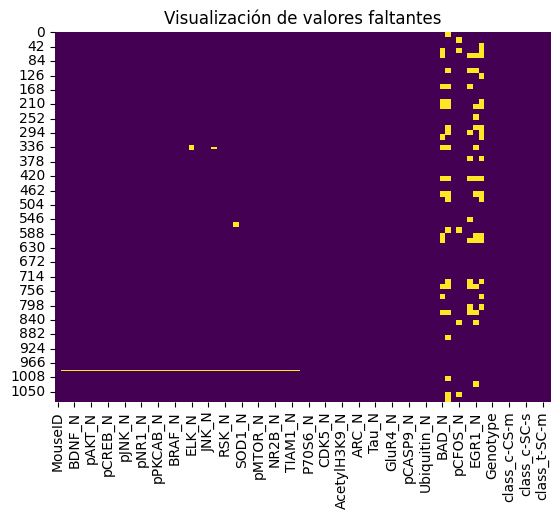

In [ ]:
# Verificar valores faltantes
print(df.isnull().sum())

# Visualizar valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores faltantes')
plt.show()

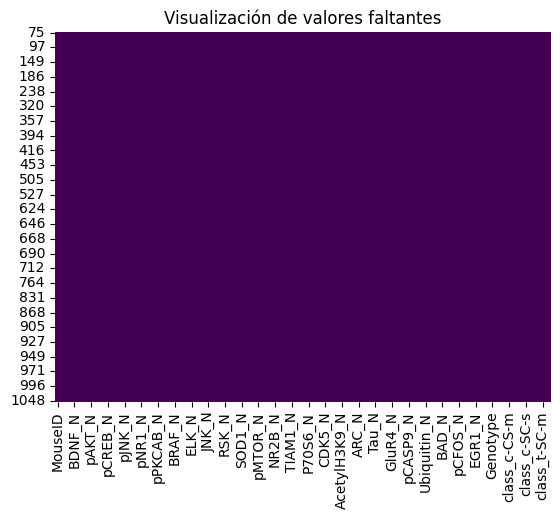

In [ ]:
# eliminar filas con valores faltantes, por las propiedades del dataset establecer el valor de la media en las variables ausentes no es un metodo optimo. Se trata de proteinas distintas en ratones distintos.

df=df.dropna()

# Visualizar valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores faltantes')
plt.show()

In [ ]:
# Eliminar duplicados si existen ya que se trata de un estudio para ratones diferentes
df.drop_duplicates(inplace=True)

# Verificar si se eliminaron duplicados
duplicados=df.duplicated().sum()

if duplicados==0:
    print("No existen duplicados en el data frame")
else:
    print("Hay duplicados aún")

No existen duplicados en el data frame


## Visualizaciones

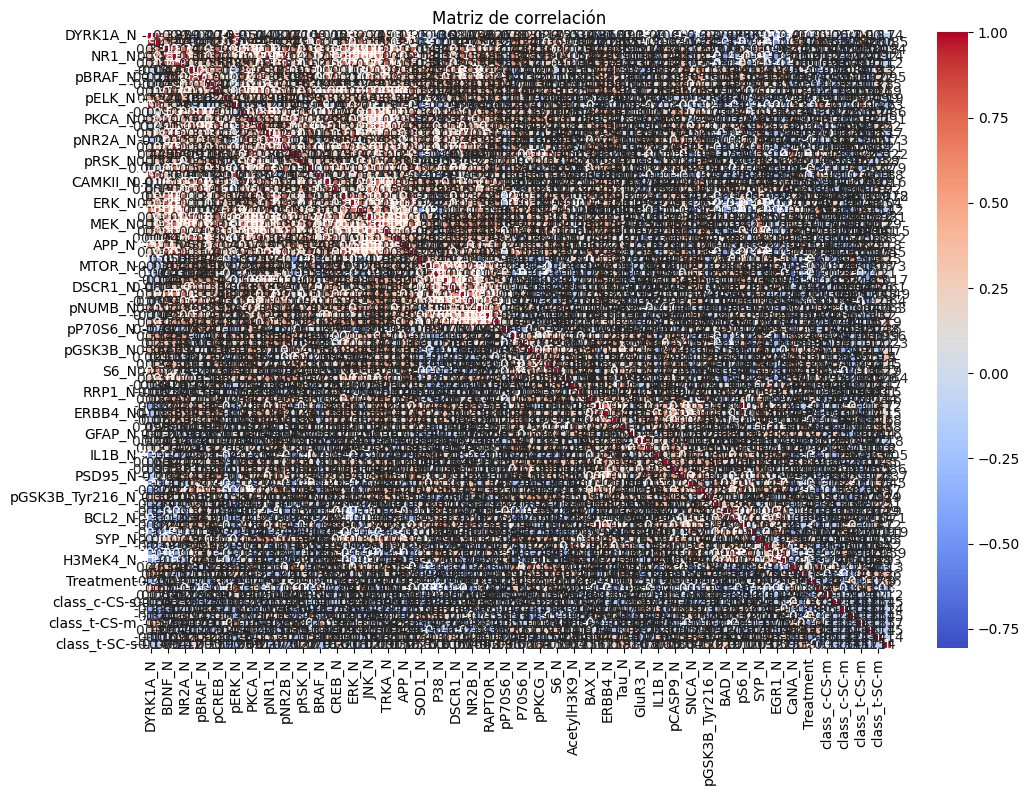

In [ ]:
# se elimina la columna de identificadores ya que no es información útil
df=df.drop(columns=['MouseID'])
correlationMatrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlationMatrix,annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()



Por el tamaño del data frame la matriz de correlación no permite ver los resultados adecuadamente. Es necesario centrar el análisis en una variable objetivo que será la razón del modelo seleccionado posteriormente y disminuir las dimensiones del data frame mediante ingeniería de atributos.
La variable Genotype es seleccionada como target con el objetivo de predecir si es de control o trisómico en función del resto de características.

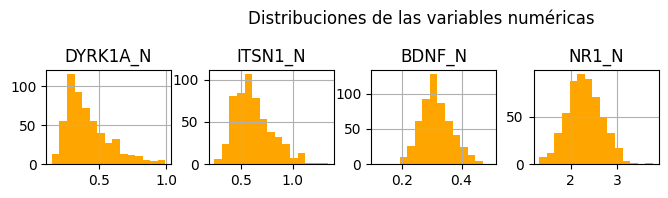

In [ ]:
# Histogramas para cada variable numérica esto es un ejemplo con cuatro variables, son demasiadas para el análisis
df[["DYRK1A_N","ITSN1_N","BDNF_N","NR1_N"]].hist(bins=15, figsize=(10, 6), layout=(4, 5), color='orange')
plt.suptitle('Distribuciones de las variables numéricas')
plt.show()

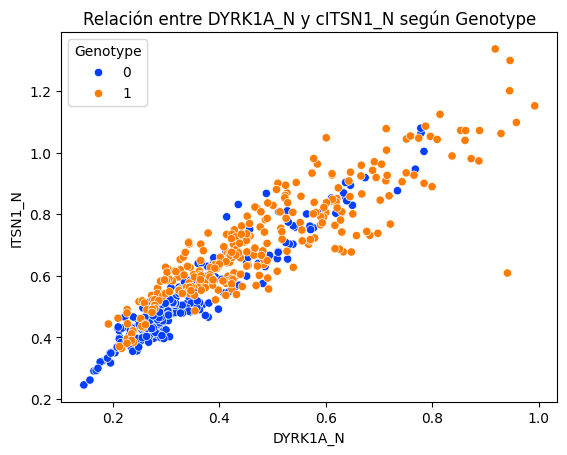

In [ ]:
# Scatter plot para ver la relación entre DYRK1A_N y ITSN1_N
sns.scatterplot(x='DYRK1A_N', y='ITSN1_N', hue='Genotype', data=df, palette='bright')
plt.title('Relación entre DYRK1A_N y cITSN1_N según Genotype')
plt.show()

## Ingeniería de Atributos

In [ ]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,Treatment,Behavior,class_c-CS-m,class_c-CS-s,class_c-SC-m,class_c-SC-s,class_t-CS-m,class_t-CS-s,class_t-SC-m,class_t-SC-s
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0,1,True,False,False,False,False,False,False,False
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0,1,True,False,False,False,False,False,False,False
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0,1,True,False,False,False,False,False,False,False
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0,1,True,False,False,False,False,False,False,False
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0,1,True,False,False,False,False,False,False,False


In [ ]:
# Aplicar seleccion según correlación

correlationTarget=abs(correlationMatrix["Genotype"])
relevantFeatures=correlationTarget[correlationTarget>0.5]
print("Atributos relevantes basados en la correlación con el class_c-CS-m o variable objetivo:")
print(relevantFeatures)

Atributos relevantes basados en la correlación con el class_c-CS-m o variable objetivo:
APP_N       0.551710
Tau_N       0.541209
Genotype    1.000000
Name: Genotype, dtype: float64


In [ ]:
# Ganancia de información
from sklearn.feature_selection import mutual_info_classif

# calculo de ganancia de info de cada atributo
X=df.drop(columns=['Genotype'])
y=df['Genotype']
infoGain=mutual_info_classif(X,y)

# Dataframe 
infoGainDF=pd.DataFrame({"Feature":X.columns, "InfoGain":infoGain})
infoGainDF=infoGainDF.sort_values(by="InfoGain",ascending=False)
print('Atributos ordenados por Ganancia de Informacion')
print(infoGainDF)

Atributos ordenados por Ganancia de Informacion
         Feature  InfoGain
56         Tau_N  0.261504
46       pPKCG_N  0.190992
1        ITSN1_N  0.172575
30         APP_N  0.165795
50  AcetylH3K9_N  0.144142
..           ...       ...
27         MEK_N  0.000000
55        nNOS_N  0.000000
78      Behavior  0.000000
75      H3MeK4_N  0.000000
77     Treatment  0.000000

[87 rows x 2 columns]


In [ ]:
# Basado en consistencia

from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar los 6 mejores atributos basados en su consistencia con la clase
selector=SelectKBest(score_func=f_classif,k=6)
selector.fit(X,y)
consistentFeatures=X.columns[selector.get_support()]
print("Atributos por consistencia")
print(consistentFeatures)

Atributos por consistencia
Index(['ITSN1_N', 'APP_N', 'S6_N', 'Tau_N', 'class_c-CS-s', 'class_c-SC-s'], dtype='object')


In [ ]:
# Comparacion y seleccion general

selectedFeatures=set(relevantFeatures.index).intersection(consistentFeatures).intersection(infoGainDF["Feature"])
print("Atributos seleccionados en comun por los tres metodos")
print(selectedFeatures)

Atributos seleccionados en comun por los tres metodos
{'APP_N', 'Tau_N'}


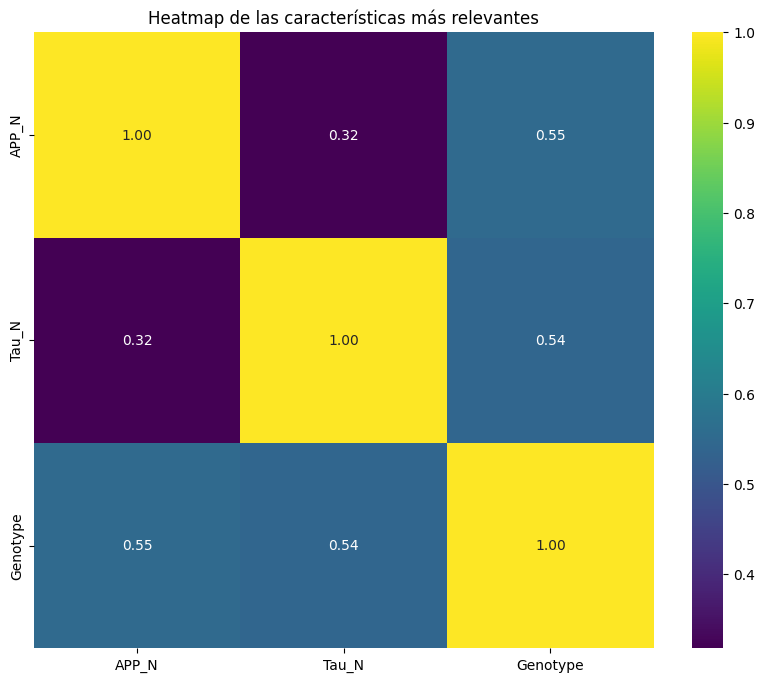

In [ ]:
#subconjunto del DataFrame con caracteristicas seleccionadas
selectedDF=df[list(selectedFeatures)+['Genotype']]

#calcular matriz de correlacion para las caracteristicas
correlationMatrixSelected=selectedDF.corr()

# mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlationMatrixSelected,annot=True, cmap='viridis', fmt='.2f')
plt.title("Heatmap de las características más relevantes")
plt.show()

Según el análisis, las variables que mayor impacto tienene en el genotipo son APP_N y Tau_N, por tanto, se puede reducir mucho el conjunto de datos si queremos establecer predicciones o clasificaciones acorde al genotipo del ratón.

## Visualizaciones por Resultados de la Ingeniería de Atributos


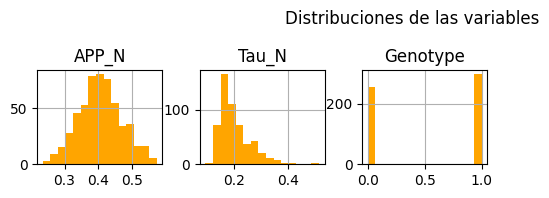

In [ ]:
# Histogramas 
selectedDF.hist(bins=15, figsize=(10, 6), layout=(4, 5), color='orange')
plt.suptitle('Distribuciones de las variables')
plt.show()

En el APP_N está más simétrico, centrado el conjunto, en TAU_N los valores se desvían hacia la izquierda, y para el Genotype como era de esperar los valores están en 0 y 1.

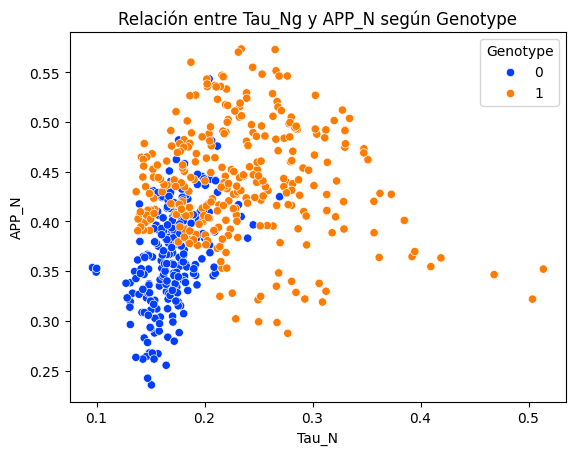

In [ ]:
# Scatter plot 
sns.scatterplot(x='Tau_N', y='APP_N', hue="Genotype", data=selectedDF, palette='bright')
plt.title('Relación entre Tau_Ng y APP_N según Genotype')
plt.show()

A pesar de los outputs existentes es posible establecer alguna regresión según el gráfico, se notan dos grupos más o menos claros con valores relativos de las variables relacionadas. Los de Genotype tipo 1, es decir trisómicos suelen tener valores más altos tanto de APP_N como de Tau_N.
Estos resultados se ven con mayor claridad en los boxplot siguientes.

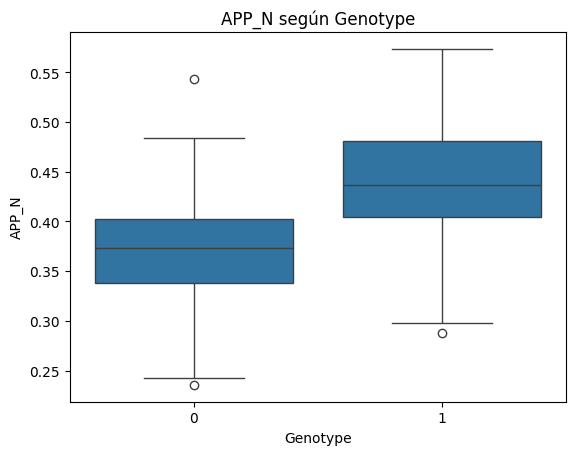

In [ ]:
sns.boxplot(x='Genotype', y='APP_N', data=selectedDF)
plt.title('APP_N según Genotype')
plt.ylabel('APP_N')
plt.show()

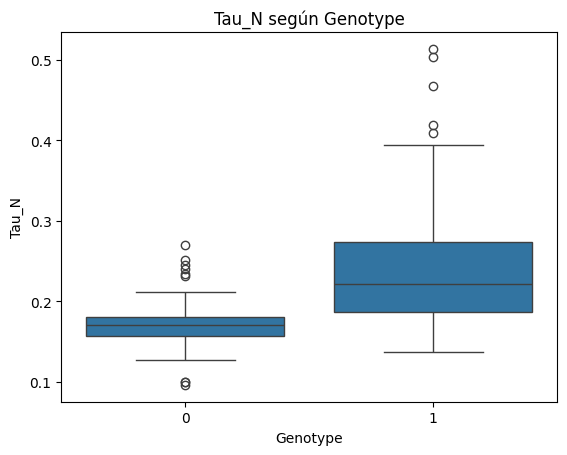

In [ ]:
sns.boxplot(x='Genotype', y='Tau_N', data=selectedDF)
plt.title('Tau_N según Genotype')
plt.ylabel('Tau_N')
plt.show()